<a href="https://colab.research.google.com/github/AngelTroncoso/Optimizacion_Bebidas/blob/main/Regresion_Polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión Polinomial en Google Colab con Scikit-learn**📈

##2: Cargar los datos

In [1]:
import pandas as pd
import io

# Datos ficticios de la empresa de bebidas
csv_data = """Mes,Publicidad_USD,Temperatura_Media_C,Ventas_Litros,Eventos_Especiales
Ene,1000,10,5000,No
Feb,1200,12,5500,No
Mar,1500,15,6200,No
Abr,2000,18,7500,No
May,2500,22,9000,No
Jun,3000,25,11000,Si
Jul,3200,28,12500,Si
Ago,3100,27,12000,Si
Sep,2800,23,9800,No
Oct,2200,19,8000,No
Nov,1800,14,6800,No
Dic,1300,11,6000,Si
"""

df = pd.read_csv(io.StringIO(csv_data))
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()

Primeras 5 filas del DataFrame:
   Mes  Publicidad_USD  Temperatura_Media_C  Ventas_Litros Eventos_Especiales
0  Ene            1000                   10           5000                 No
1  Feb            1200                   12           5500                 No
2  Mar            1500                   15           6200                 No
3  Abr            2000                   18           7500                 No
4  May            2500                   22           9000                 No

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mes                  12 non-null     object
 1   Publicidad_USD       12 non-null     int64 
 2   Temperatura_Media_C  12 non-null     int64 
 3   Ventas_Litros        12 non-null     int64 
 4   Eventos_Especiales   12 non-null     object
dtypes: int64(3), object(2)

##3: Preprocesamiento de datos

In [2]:
# Convertir 'Eventos_Especiales' a variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Eventos_Especiales'], drop_first=True)
print("\nDataFrame después de One-Hot Encoding:")
print(df.head())


DataFrame después de One-Hot Encoding:
   Mes  Publicidad_USD  Temperatura_Media_C  Ventas_Litros  \
0  Ene            1000                   10           5000   
1  Feb            1200                   12           5500   
2  Mar            1500                   15           6200   
3  Abr            2000                   18           7500   
4  May            2500                   22           9000   

   Eventos_Especiales_Si  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  


##4: Definir características (X) y variable objetivo (y)

In [3]:
# Definir características (X) y variable objetivo (y)
# Excluimos 'Mes' ya que no es una característica predictiva en este caso
X = df.drop(['Mes', 'Ventas_Litros'], axis=1)
y = df['Ventas_Litros']

print("\nCaracterísticas (X):")
print(X.head())
print("\nVariable Objetivo (y):")
print(y.head())


Características (X):
   Publicidad_USD  Temperatura_Media_C  Eventos_Especiales_Si
0            1000                   10                  False
1            1200                   12                  False
2            1500                   15                  False
3            2000                   18                  False
4            2500                   22                  False

Variable Objetivo (y):
0    5000
1    5500
2    6200
3    7500
4    9000
Name: Ventas_Litros, dtype: int64


##5: Generar características polinomiales

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Crear características polinomiales de grado 2 (puedes ajustar el grado)
# Por ejemplo, si tenemos Publicidad_USD, creará Publicidad_USD^2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

print(f"\nNúmero de características originales: {X.shape[1]}")
print(f"Número de características polinomiales (grado 2): {X_poly.shape[1]}")
print("Primeras 5 filas de características polinomiales:")
print(pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns)).head())


Número de características originales: 3
Número de características polinomiales (grado 2): 10
Primeras 5 filas de características polinomiales:
     1  Publicidad_USD  Temperatura_Media_C  Eventos_Especiales_Si  \
0  1.0          1000.0                 10.0                    0.0   
1  1.0          1200.0                 12.0                    0.0   
2  1.0          1500.0                 15.0                    0.0   
3  1.0          2000.0                 18.0                    0.0   
4  1.0          2500.0                 22.0                    0.0   

   Publicidad_USD^2  Publicidad_USD Temperatura_Media_C  \
0         1000000.0                             10000.0   
1         1440000.0                             14400.0   
2         2250000.0                             22500.0   
3         4000000.0                             36000.0   
4         6250000.0                             55000.0   

   Publicidad_USD Eventos_Especiales_Si  Temperatura_Media_C^2  \
0             

##6: Dividir los datos en conjuntos de entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split

# Dividir los datos polinomiales en conjuntos de entrenamiento y prueba
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento X (polinomial): {X_train_poly.shape}")
print(f"Tamaño del conjunto de prueba X (polinomial): {X_test_poly.shape}")
print(f"Tamaño del conjunto de entrenamiento y: {y_train.shape}")
print(f"Tamaño del conjunto de prueba y: {y_test.shape}")


Tamaño del conjunto de entrenamiento X (polinomial): (9, 10)
Tamaño del conjunto de prueba X (polinomial): (3, 10)
Tamaño del conjunto de entrenamiento y: (9,)
Tamaño del conjunto de prueba y: (3,)


##7: Entrenar el modelo de Regresión Lineal con características polinomiales

In [6]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
model_poly = LinearRegression()

# Entrenar el modelo con los datos polinomiales de entrenamiento
model_poly.fit(X_train_poly, y_train)

print("\nModelo de Regresión Polinomial (usando LinearRegression) entrenado.")


Modelo de Regresión Polinomial (usando LinearRegression) entrenado.


##8: Realizar predicciones

In [7]:
# Realizar predicciones sobre el conjunto de prueba polinomial
y_pred_poly = model_poly.predict(X_test_poly)

print("\nPredicciones realizadas en el conjunto de prueba:")
print("Primeras 5 predicciones:", y_pred_poly[:5].round(2)) # Redondeamos para mejor visualización
print("Valores reales correspondientes:", y_test.head().tolist())


Predicciones realizadas en el conjunto de prueba:
Primeras 5 predicciones: [6994.93 8033.9  5108.52]
Valores reales correspondientes: [6800, 8000, 5000]


##9: Evaluar el modelo

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluar el rendimiento del modelo polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nError Cuadrático Medio (MSE) Polinomial: {mse_poly:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) Polinomial: {rmse_poly:.2f}")
print(f"Coeficiente de Determinación (R^2) Polinomial: {r2_poly:.2f}")

# Opcional: Mostrar los coeficientes del modelo (serán muchos debido a las características polinomiales)
print("\nCoeficientes del modelo Polinomial:")
# Es útil ver a qué característica original corresponde cada coeficiente
# poly_features.get_feature_names_out(X.columns) nos da los nombres de las nuevas características
feature_names_poly = poly_features.get_feature_names_out(X.columns)
for feature, coef in zip(feature_names_poly, model_poly.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intersección (Bias): {model_poly.intercept_:.2f}")


Error Cuadrático Medio (MSE) Polinomial: 16974.29
Raíz del Error Cuadrático Medio (RMSE) Polinomial: 130.29
Coeficiente de Determinación (R^2) Polinomial: 0.99

Coeficientes del modelo Polinomial:
1: -0.00
Publicidad_USD: 3.25
Temperatura_Media_C: -294.99
Eventos_Especiales_Si: -88.36
Publicidad_USD^2: 0.00
Publicidad_USD Temperatura_Media_C: -0.12
Publicidad_USD Eventos_Especiales_Si: -2.61
Temperatura_Media_C^2: 16.24
Temperatura_Media_C Eventos_Especiales_Si: 339.44
Eventos_Especiales_Si^2: -88.36
Intersección (Bias): 4053.41


Interpretación de los Resultados:  
MSE y RMSE Polinomial: Al igual que en la regresión lineal, indican el error promedio. Un RMSE más bajo es mejor.  

R² Polinomial: Muestra qué porcentaje de la varianza en las Ventas_Litros es explicada por el modelo polinomial. Un valor más cercano a 1 indica un mejor ajuste.  

Coeficientes: Con la regresión polinomial, el número de coeficientes aumenta porque estamos creando nuevas características (por ejemplo, Publicidad_USD^2, Temperatura_Media_C * Publicidad_USD). Interpretar cada coeficiente individualmente es más complejo que en la regresión lineal simple, ya que el efecto de una característica ahora depende de sus potencias y de las interacciones con otras características.  

##10: Representar en Grafico


Creando gráficos...


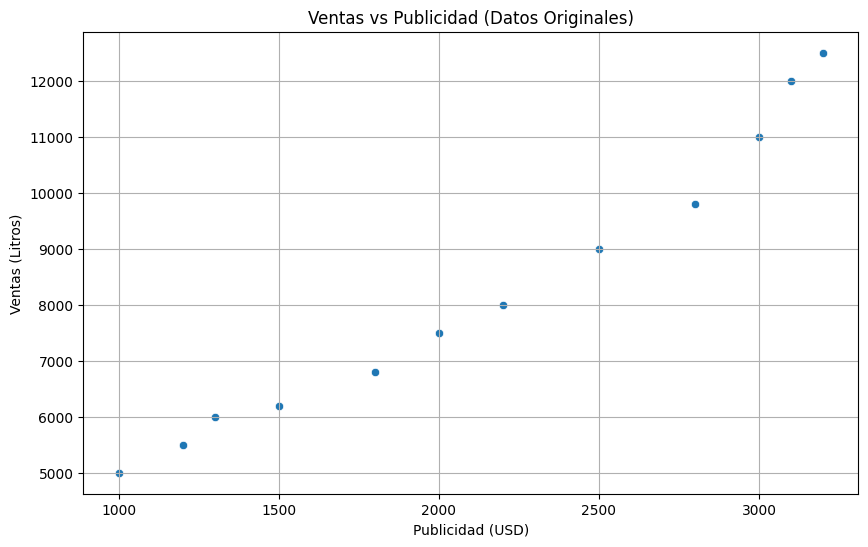

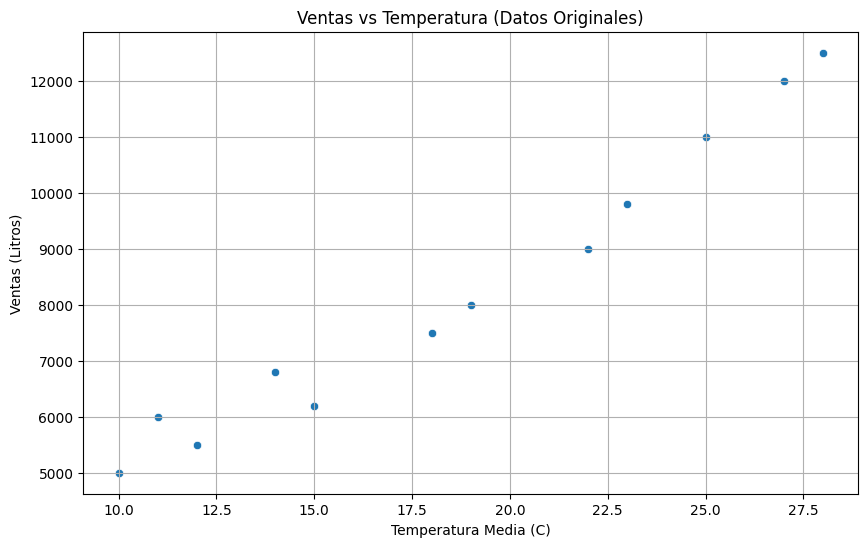

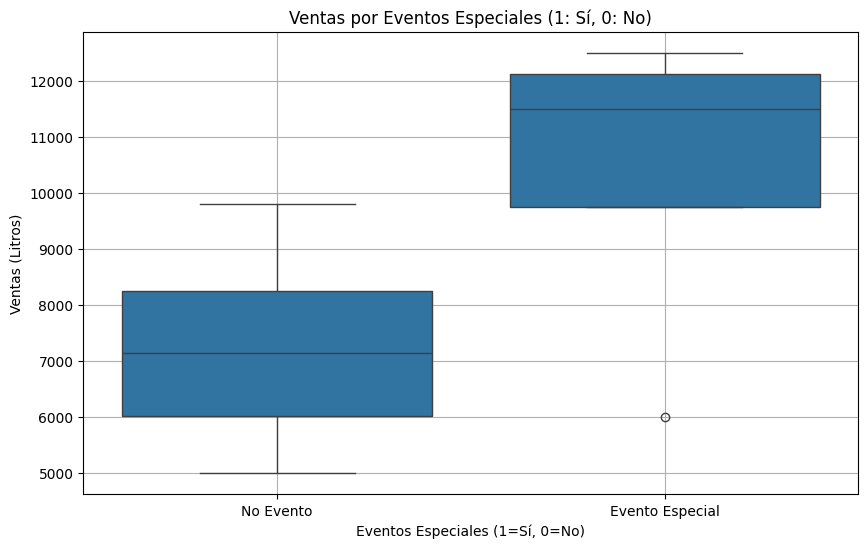

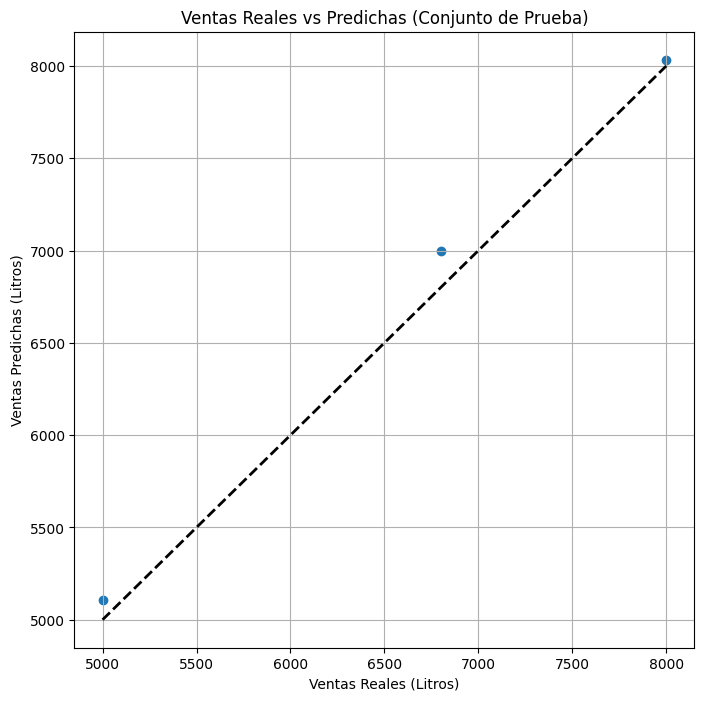

<Figure size 1200x600 with 0 Axes>

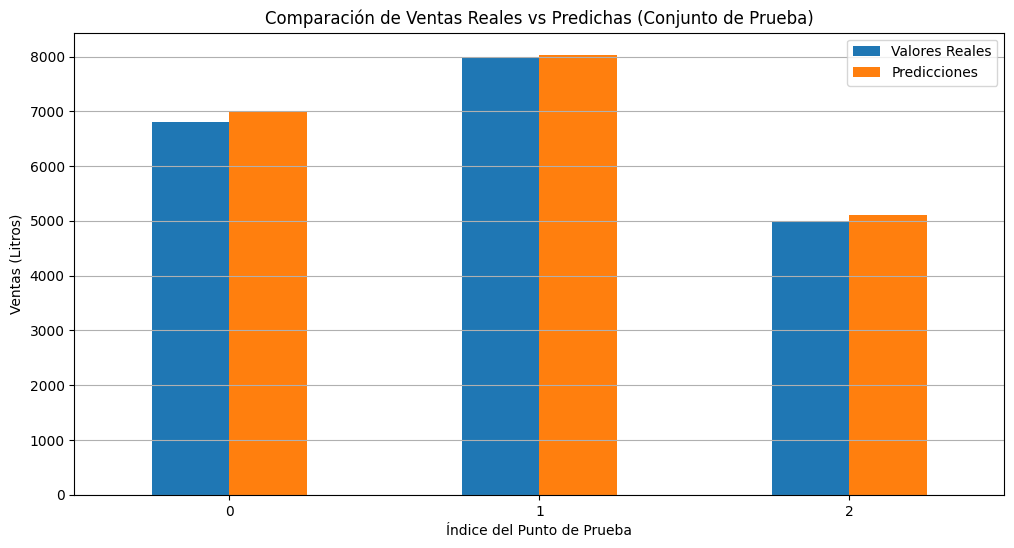

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dado que solo tenemos 12 puntos de datos, un scatter plot es más apropiado
# que una línea suave para representar las predicciones vs reales en el conjunto de prueba.
# También podemos graficar las características originales vs Ventas_Litros.

print("\nCreando gráficos...")

# Gráfico: Ventas_Litros vs Publicidad_USD (Datos originales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Publicidad_USD'], y=df['Ventas_Litros'])
plt.title('Ventas vs Publicidad (Datos Originales)')
plt.xlabel('Publicidad (USD)')
plt.ylabel('Ventas (Litros)')
plt.grid(True)
plt.show()

# Gráfico: Ventas_Litros vs Temperatura_Media_C (Datos originales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperatura_Media_C'], y=df['Ventas_Litros'])
plt.title('Ventas vs Temperatura (Datos Originales)')
plt.xlabel('Temperatura Media (C)')
plt.ylabel('Ventas (Litros)')
plt.grid(True)
plt.show()

# Gráfico: Ventas_Litros vs Eventos_Especiales_Si (Datos originales después de encoding)
# Aunque Eventos_Especiales_Si es 0 o 1, podemos ver cómo las ventas se agrupan
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Eventos_Especiales_Si'], y=df['Ventas_Litros'])
plt.title('Ventas por Eventos Especiales (1: Sí, 0: No)')
plt.xlabel('Eventos Especiales (1=Sí, 0=No)')
plt.ylabel('Ventas (Litros)')
plt.xticks([0, 1], ['No Evento', 'Evento Especial'])
plt.grid(True)
plt.show()


# Gráfico: Valores Reales vs Predicciones (Conjunto de Prueba)
# Dado que es un conjunto de prueba pequeño y no ordenado por ninguna variable,
# un scatter plot o un bar plot comparando cada punto es más visual.
# Usaremos un scatter plot de Predicciones vs Reales.

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de identidad
plt.xlabel('Ventas Reales (Litros)')
plt.ylabel('Ventas Predichas (Litros)')
plt.title('Ventas Reales vs Predichas (Conjunto de Prueba)')
plt.grid(True)
plt.show()

# Opcional: Gráfico de barras comparando valores reales y predichos en el conjunto de prueba
# Esto es útil si el conjunto de prueba es muy pequeño para ver cada comparación.
test_results = pd.DataFrame({'Valores Reales': y_test, 'Predicciones': y_pred_poly})
test_results = test_results.reset_index(drop=True) # Reset index para graficar

plt.figure(figsize=(12, 6))
test_results.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Ventas Reales vs Predichas (Conjunto de Prueba)')
plt.xlabel('Índice del Punto de Prueba')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()
